In [1]:
# Importación de librerías generales
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb 


# Lectura del dataset
air_q = pd.read_csv('AirQualityUCI.csv')

In [2]:
# Se convierte la columna Time en numérica
air_q['Time'] = air_q.Time.replace({':00:00':' '}, regex=True)
air_q['Time'] = pd.to_numeric(air_q['Time'])
air_q

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,04/04/2005,11,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,04/04/2005,12,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,04/04/2005,13,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


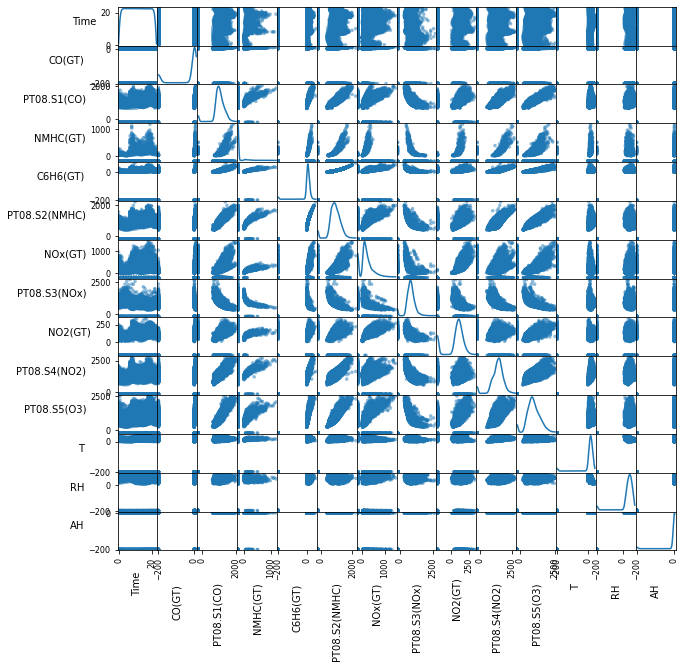

In [3]:
# Matriz de dispersión (scatter) y pares de variables
scatter_matrix = pd.plotting.scatter_matrix(
    air_q,
    figsize  = [10, 10],
    marker   = ".",
    s        = 50,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0, ha='right')   

<AxesSubplot:>

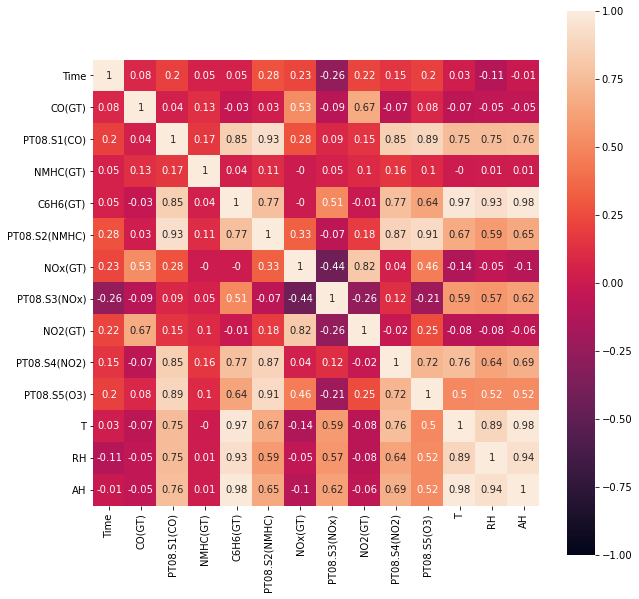

In [4]:
# Matriz de correlación
corrMatrix = air_q.corr()

plt.rcParams['figure.figsize'] = 10, 10
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True)

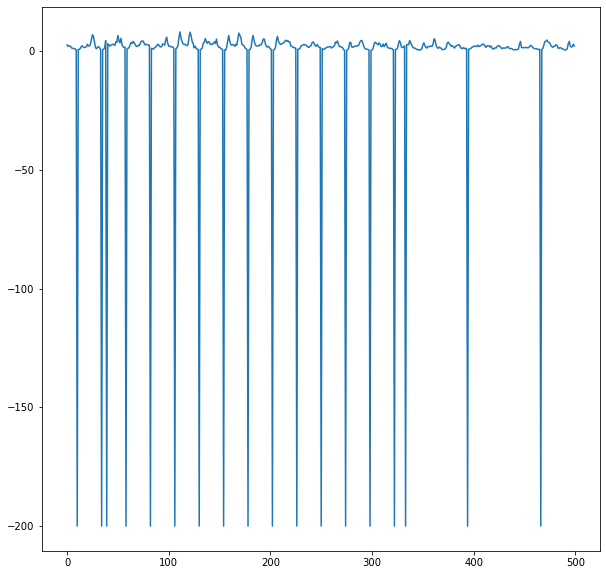

In [38]:
plt.plot(air_q['CO(GT)'][0:500])

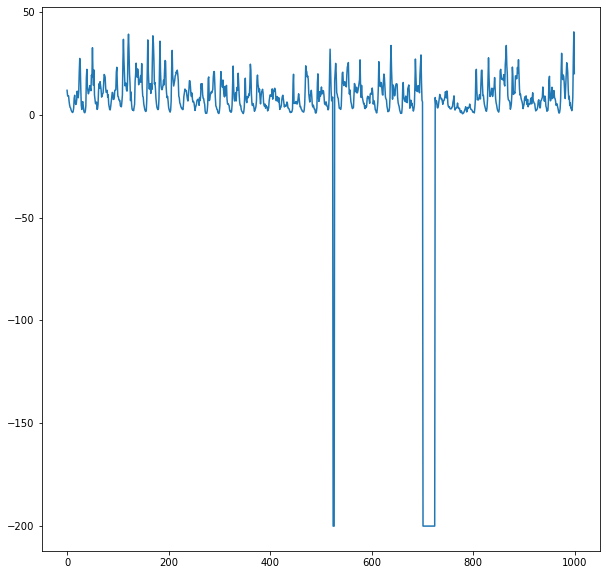

In [36]:
plt.plot(air_q['C6H6(GT)'][0:1000])

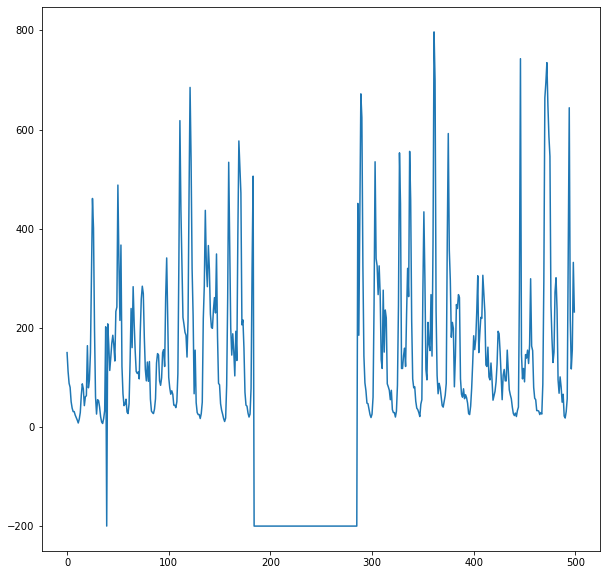

In [29]:
plt.plot(air_q['NMHC(GT)'][0:500])

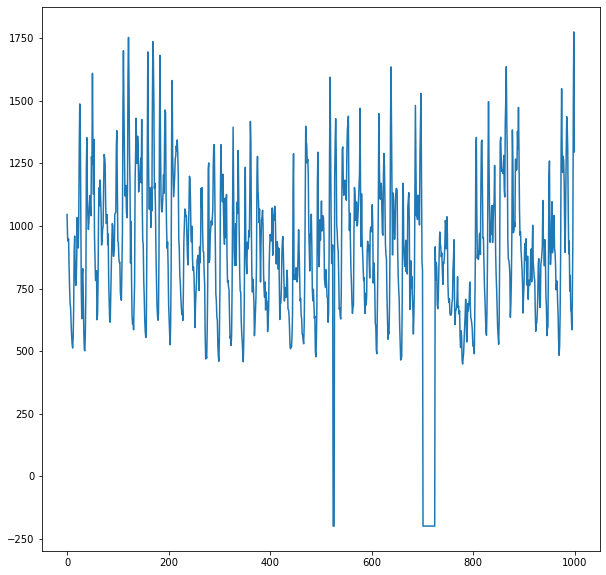

In [31]:
plt.plot(air_q['PT08.S2(NMHC)'][0:1000])

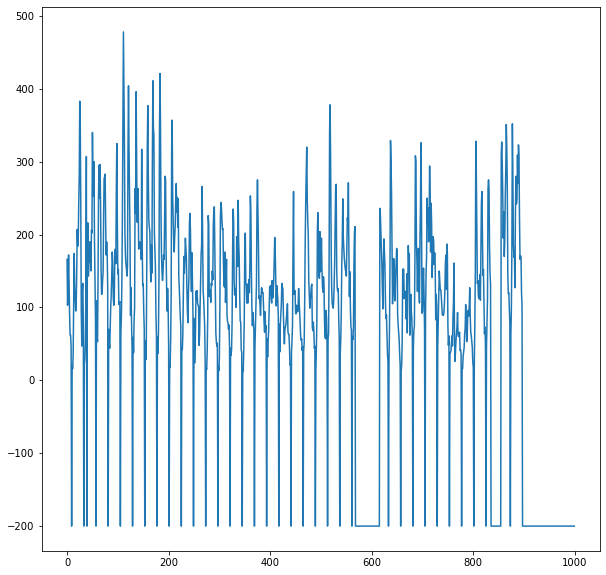

In [32]:
plt.plot(air_q['NOx(GT)'][0:1000])

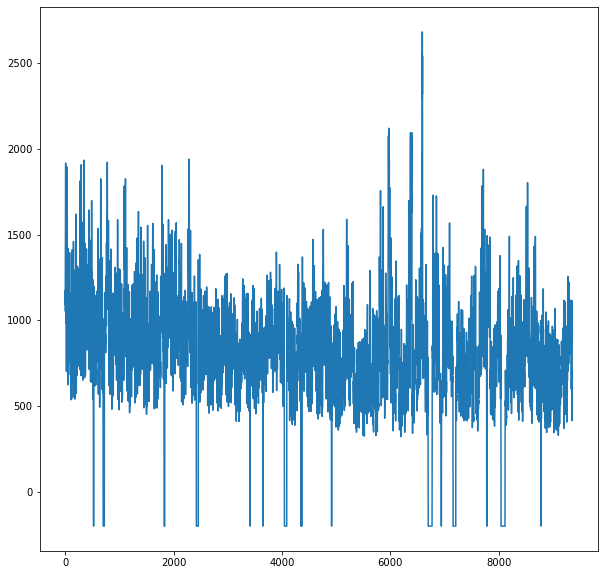

In [34]:
plt.plot(air_q['PT08.S3(NOx)'])

In [6]:
# evaluate an ARIMA model using a walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
# split into train and test sets
X = air_q['CO(GT)'].to_numpy()
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

In [8]:
print(len(train))
print(len(test))

6175
3182


In [9]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

KeyboardInterrupt: 

In [ ]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()